<a href="https://colab.research.google.com/github/alaa-orabi/AI-Uni-project/blob/main/Final_EfficientNetB3_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🌿 EfficientNetB3 – PlantVillage Disease Classification Notebook**

## **🧪 Data Preparation, Cleaning & Augmentation Pipeline**

###📌**1. Import Libraries**

#### 🔧 **Purpose:** Load all required Python libraries for data handling, visualization, image processing, model building, training, and evaluation.

📚 **Includes:**

OS & file handling (os, shutil)

Numerical computing (numpy)

Visualization (matplotlib)

Image processing (PIL, cv2)

Machine learning & deep learning (TensorFlow, Keras, sklearn)

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import random
import shutil
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam



###📌**2. Download PlantVillage Dataset**

####⬇️ **Purpose:** Download the PlantVillage dataset directly from Kaggle using kagglehub.

📂 **Outcome:**

Dataset is stored locally

Root directory path is printed for verification

In [2]:
import kagglehub


path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

100%|██████████| 658M/658M [00:03<00:00, 194MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1


###📌 **3. Dataset Structure & Class Listing**


#### 📁 **Purpose:**

1. Locate the PlantVillage directory

2. List all disease classes

3. Count total number of classes

✅ Ensures dataset integrity before processing.

In [3]:
import os

# Correct PlantVillage path from KaggleHub
data_root = os.path.join(path, "PlantVillage")

# List classes
classes = sorted(os.listdir(data_root))

print("Number of Classes:", len(classes))
print(classes[:20])

Number of Classes: 15
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


###📌 **4. Class Name Formatting Utility**



####✍️**Purpose:**

Convert raw folder names into human‑readable class names

🔄 **Example:** Tomato___Late_blight → Tomato - Late Blight

Used later for plots, reports, and UI display.

In [4]:
# ============================================
# Format Class Names - View 15 Examples
# ============================================

def format_class_name(class_name):

    # Replace underscores with spaces
    formatted = class_name.replace('___', ' - ')  # Replace triple underscore with dash
    formatted = formatted.replace('__', ' ')      # Replace double underscore with space
    formatted = formatted.replace('_', ' ')       # Replace single underscore with space

    # Capitalize each word
    formatted = formatted.title()

    return formatted

# Display before and after for first 15 classes
print(f"{'='*100}")
print(f"CLASS NAME FORMATTING - FIRST 15 CLASSES")
print(f"{'='*100}")
print(f"{'No.':<5} {'Original':<50} {'Formatted':<45}")
print(f"{'-'*100}")

for idx, cls in enumerate(classes[:15], 1):
    formatted = format_class_name(cls)
    print(f"{idx:<5} {cls:<50} {formatted:<45}")

print(f"{'='*100}")

CLASS NAME FORMATTING - FIRST 15 CLASSES
No.   Original                                           Formatted                                    
----------------------------------------------------------------------------------------------------
1     Pepper__bell___Bacterial_spot                      Pepper Bell - Bacterial Spot                 
2     Pepper__bell___healthy                             Pepper Bell - Healthy                        
3     Potato___Early_blight                              Potato - Early Blight                        
4     Potato___Late_blight                               Potato - Late Blight                         
5     Potato___healthy                                   Potato - Healthy                             
6     Tomato_Bacterial_spot                              Tomato Bacterial Spot                        
7     Tomato_Early_blight                                Tomato Early Blight                          
8     Tomato_Late_blight          

###📌 **5. Sample Image Visualization**



####**🖼️ Purpose:** Display random sample images from different classes.

**👀 Helps visually confirm:**

1. Image quality

2. Class diversity

3. Correct dataset loading

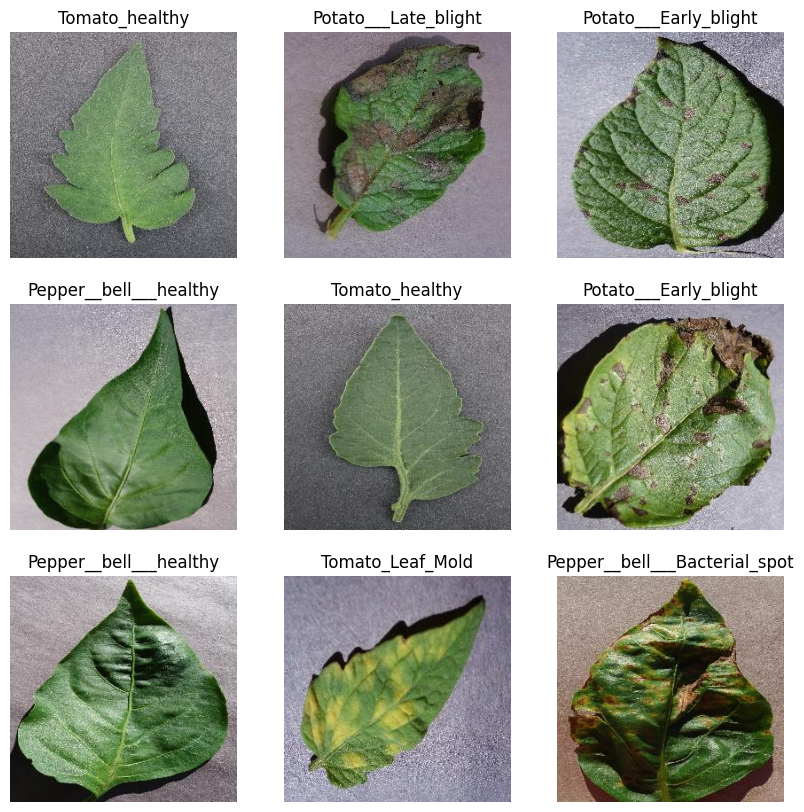

In [5]:
import matplotlib.pyplot as plt
import random
from PIL import Image

plt.figure(figsize=(10,10))

for i in range(9):
    cls = random.choice(classes)
    img_path = os.path.join(data_root, cls, random.choice(os.listdir(os.path.join(data_root, cls))))
    img = Image.open(img_path)

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()


###📌 **6. Image Count per Class (Sorted Descending)**



#### **📊 Purpose:**

1. Count number of images in each class

2. Print sorted distribution

3. 📈 Provides insight into class imbalance.

In [7]:
# ============================================
# Print Image Count for Each Class (SORTED Descending)
# ============================================

class_distribution = {}
for cls in classes:
    cls_path = os.path.join(data_root, cls)
    if os.path.isdir(cls_path):
        num_images = len([f for f in os.listdir(cls_path)
                         if os.path.isfile(os.path.join(cls_path, f))])
        class_distribution[cls] = num_images

# Sort by count (descending order - highest to lowest)
sorted_classes = sorted(class_distribution.items(), key=lambda x: x[1], reverse=True)

# Print header
print(f"{'='*80}")
print(f"IMAGE COUNT PER CLASS (SORTED BY COUNT Descending)")
print(f"{'='*80}")
print(f"{'No.':<5} {'Class Name':<50} {'Count':>10}")
print(f"{'-'*80}")

# Print each class with its count
for idx, (cls_name, count) in enumerate(sorted_classes, 1):
    print(f"{idx:<5} {cls_name:<50} {count:>10,}")

# Print summary statistics
print(f"{'-'*80}")
print(f"{'TOTAL CLASSES':<55} {len(class_distribution):>10}")
print(f"{'TOTAL IMAGES':<55} {sum(class_distribution.values()):>10,}")
print(f"{'AVERAGE IMAGES PER CLASS':<55} {sum(class_distribution.values())//len(class_distribution):>10,}")
print(f"{'MIN IMAGES IN A CLASS':<55} {min(class_distribution.values()):>10,}")
print(f"{'MAX IMAGES IN A CLASS':<55} {max(class_distribution.values()):>10,}")
print(f"{'='*80}")

IMAGE COUNT PER CLASS (SORTED BY COUNT Descending)
No.   Class Name                                              Count
--------------------------------------------------------------------------------
1     Tomato__Tomato_YellowLeaf__Curl_Virus                   3,209
2     Tomato_Bacterial_spot                                   2,127
3     Tomato_Late_blight                                      1,909
4     Tomato_Septoria_leaf_spot                               1,771
5     Tomato_Spider_mites_Two_spotted_spider_mite             1,676
6     Tomato_healthy                                          1,591
7     Pepper__bell___healthy                                  1,478
8     Tomato__Target_Spot                                     1,404
9     Potato___Early_blight                                   1,000
10    Potato___Late_blight                                    1,000
11    Tomato_Early_blight                                     1,000
12    Pepper__bell___Bacterial_spot                 

###**📌 7. Class Distribution Visualization**



#### **📉 Purpose:** Visualize dataset imbalance using a bar chart.

📏 Includes average line for quick comparison.

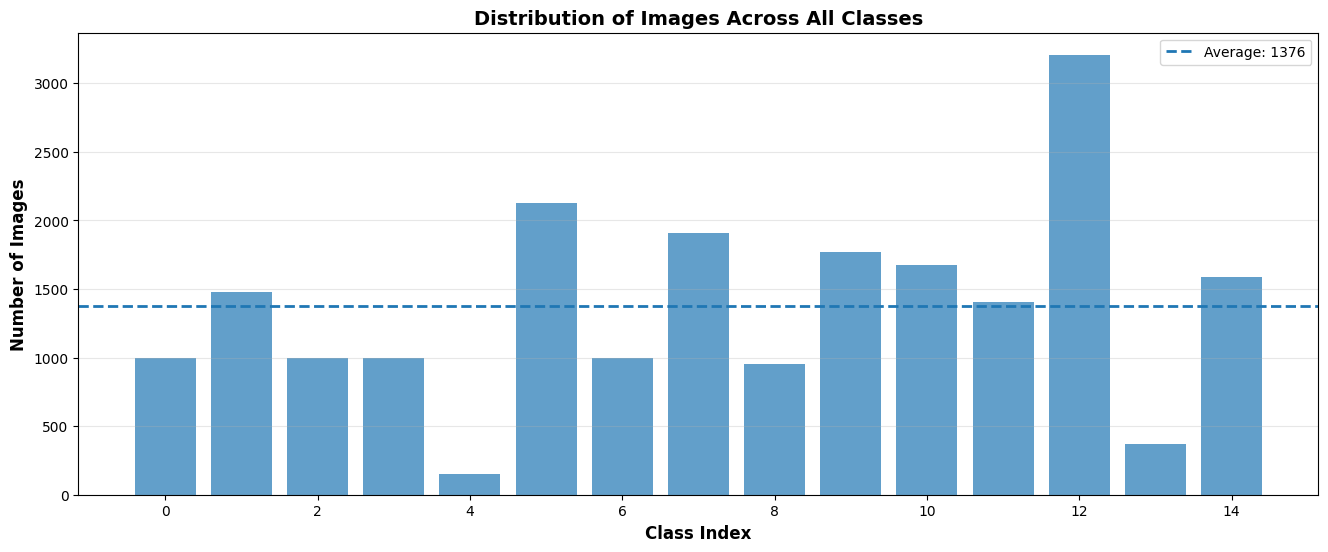

In [9]:
# ============================================
# Visualize Class Distribution (SINGLE PLOT)
# ============================================

import matplotlib.pyplot as plt
import numpy as np

# Calculate statistics
total_images = sum(class_distribution.values())
avg_images = np.mean(list(class_distribution.values()))

# Create figure with ONE plot
fig, ax = plt.subplots(figsize=(16, 6))

class_names_short = [cls[:30] for cls in class_distribution.keys()]
counts = list(class_distribution.values())

ax.bar(range(len(counts)), counts, alpha=0.7)
ax.axhline(y=avg_images, linestyle='--', linewidth=2, label=f'Average: {avg_images:.0f}')

ax.set_xlabel('Class Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Images Across All Classes', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()


#

###📌 **8. Corrupted Image Detection**



#### **🚨 Purpose:** Identify and count corrupted or unreadable image files.

**🛡️ Why important?**

1. Prevents training crashes

2. Ensures data quality

In [6]:
import os
from PIL import Image

data_root = os.path.join(path, "PlantVillage")   # your KaggleHub dataset path

corrupted_images = []

for cls in os.listdir(data_root):
    cls_path = os.path.join(data_root, cls)
    if not os.path.isdir(cls_path):
        continue

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        try:
            img = Image.open(img_path)
            img.verify()   # verifies file integrity
        except Exception:
            corrupted_images.append(img_path)

print("Total corrupted images found:", len(corrupted_images))

if corrupted_images:
    print("\nList of corrupted image files:")
    for img in corrupted_images:
        print(img)
else:
    print("No corrupted images found. Dataset is clean!")


Total corrupted images found: 1

List of corrupted image files:
/root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c


###**📌 9. Duplicate Image Detection**



#### **🧬 Purpose:** Detect duplicate images using MD5 hashing.

**⚠️ Why?**

Prevents data leakage

Avoids biased training

In [8]:
# ============================================
# Count Duplicates Per Class
# ============================================

import hashlib
from collections import defaultdict

def get_image_hash(img_path):
    """Calculate MD5 hash of an image"""
    with open(img_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

print("Checking for duplicates in each class...\n")

# Dictionary to store duplicates per class
class_duplicates = {}

for cls in classes:
    cls_path = os.path.join(data_root, cls)
    if not os.path.isdir(cls_path):
        continue

    # Hash all images in this class
    image_hashes = defaultdict(list)

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        if os.path.isfile(img_path):
            img_hash = get_image_hash(img_path)
            image_hashes[img_hash].append(img_path)

    # Count duplicates (hashes that appear more than once)
    duplicate_count = sum(1 for paths in image_hashes.values() if len(paths) > 1)
    class_duplicates[cls] = duplicate_count

# Print results
print(f"{'='*80}")
print(f"DUPLICATE COUNT PER CLASS")
print(f"{'='*80}")
print(f"{'No.':<5} {'Class Name':<50} {'Duplicates':>10}")
print(f"{'-'*80}")

for idx, cls in enumerate(classes, 1):
    dup_count = class_duplicates.get(cls, 0)
    status = "✓" if dup_count == 0 else f"⚠️ {dup_count}"
    print(f"{idx:<5} {cls:<50} {dup_count:>10}")

# Summary
print(f"{'-'*80}")
total_duplicates = sum(class_duplicates.values())
classes_with_duplicates = sum(1 for count in class_duplicates.values() if count > 0)
classes_without_duplicates = len(classes) - classes_with_duplicates

print(f"{'TOTAL DUPLICATE SETS':<55} {total_duplicates:>10}")
print(f"{'CLASSES WITH DUPLICATES':<55} {classes_with_duplicates:>10}")
print(f"{'CLASSES WITHOUT DUPLICATES':<55} {classes_without_duplicates:>10}")
print(f"{'='*80}")


Checking for duplicates in each class...

DUPLICATE COUNT PER CLASS
No.   Class Name                                         Duplicates
--------------------------------------------------------------------------------
1     Pepper__bell___Bacterial_spot                               0
2     Pepper__bell___healthy                                      0
3     Potato___Early_blight                                       0
4     Potato___Late_blight                                        0
5     Potato___healthy                                            0
6     Tomato_Bacterial_spot                                       0
7     Tomato_Early_blight                                         0
8     Tomato_Late_blight                                          8
9     Tomato_Leaf_Mold                                            0
10    Tomato_Septoria_leaf_spot                                   0
11    Tomato_Spider_mites_Two_spotted_spider_mite                 0
12    Tomato__Target_Spot          

###**📌10. Data Augmentation Configuration**



#### **🔁 Purpose:** Define augmentation strategy for training data.

**✨ Augmentations include:**

1. Rotation

2. Shifting

3. Zoom

4. Brightness

5. Horizontal flipping


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,                    # Normalize to [0,1]
    rotation_range=20,                 # ±20° rotation (increased from 10)
    width_shift_range=0.2,             # Shift horizontally by 20%
    height_shift_range=0.2,            # Shift vertically by 20%
    shear_range=0.15,                  # Shear transformation
    zoom_range=0.2,                    # Zoom in/out by 20%
    horizontal_flip=True,              # Random horizontal flip
    brightness_range=[0.8, 1.2],       # ±20% brightness variation
    fill_mode='nearest',               # How to fill empty pixels
    validation_split=0.2               # 20% for validation
)

# Validation data generator (NO augmentation, only rescaling)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

print("✓ Data augmentation configured!")
print("\nTraining augmentations:")
print("  - Rotation: ±20°")
print("  - Shifts: ±20%")
print("  - Zoom: ±20%")
print("  - Brightness: 80-120%")
print("  - Horizontal flip: Yes")
print("\nValidation: Only rescaling (no augmentation)")

✓ Data augmentation configured!

Training augmentations:
  - Rotation: ±20°
  - Shifts: ±20%
  - Zoom: ±20%
  - Brightness: 80-120%
  - Horizontal flip: Yes

Validation: Only rescaling (no augmentation)


### **📌 11. Dataset Splitting (Train / Val / Test)**



#### **🗂️ Purpose:**

Create clean directory structure (dataset/train/ , dataset/val/ , dataset/test/)

Split data per class

**📊 Split Ratio:**

60% Training

20% Validation

20% Testing

In [11]:
from sklearn.model_selection import train_test_split
import shutil
import os
from PIL import Image

# FIX: Correctly set the data directory
# The path from kagglehub includes the dataset root
data_dir = os.path.join(path, 'PlantVillage')

# Check if this path exists
if not os.path.exists(data_dir):
    # If not, path might already be the PlantVillage folder
    data_dir = path
    print(f"Using path directly: {data_dir}")
else:
    print(f"Using PlantVillage subdirectory: {data_dir}")

# Verify it's a directory
if not os.path.isdir(data_dir):
    print(f"ERROR: {data_dir} is not a directory!")
    print(f"Let's find the correct path...")

    # Find the actual PlantVillage directory
    import glob
    possible_paths = glob.glob('/kaggle/input/**/PlantVillage', recursive=True)
    if possible_paths:
        data_dir = possible_paths[0]
        print(f"✓ Found PlantVillage at: {data_dir}")
    else:
        print("Could not find PlantVillage directory")
        # List what's in path to debug
        print(f"\nContents of path variable ({path}):")
        if os.path.isdir(path):
            print(os.listdir(path))

# Now continue with the split
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
classes.sort()

print(f"\n✓ Found {len(classes)} classes")
print(f"Data directory: {data_dir}")

# Remove existing dataset folder if it exists
if os.path.exists("dataset"):
    shutil.rmtree("dataset")

# Create directories
os.makedirs("dataset/train", exist_ok=True)
os.makedirs("dataset/val", exist_ok=True)
os.makedirs("dataset/test", exist_ok=True)

print(f"\nProcessing {len(classes)} classes...")
print("Split: 60% Train | 20% Validation | 20% Test\n")

total_copied_files = 0
split_summary = {'train': 0, 'val': 0, 'test': 0}

for cls in classes:
    cls_path = os.path.join(data_dir, cls)

    if not os.path.isdir(cls_path):
        continue

    imgs = os.listdir(cls_path)

    # Validate images
    valid_imgs = []
    for img_name in imgs:
        src_path = os.path.join(cls_path, img_name)
        if os.path.isfile(src_path):
            try:
                img = Image.open(src_path)
                img.convert('RGB')
                valid_imgs.append(img_name)
            except Exception as e:
                pass  # Skip corrupted silently

    if not valid_imgs:
        print(f"⚠️ No valid images for class: {cls}, skipping.")
        continue

    print(f"✓ {cls}: {len(valid_imgs)} valid images")

    # Split: 60% train, 40% temp (20% val + 20% test)
    train, temp = train_test_split(valid_imgs, test_size=0.4, random_state=42)

    # Split temp: 50% val, 50% test (each is 20% of total)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Copy files to respective directories
    for folder, files in [("train", train), ("val", val), ("test", test)]:
        target_dir = os.path.join(f"dataset/{folder}", cls)
        os.makedirs(target_dir, exist_ok=True)

        for f in files:
            src_path = os.path.join(cls_path, f)
            shutil.copy(src_path, os.path.join(target_dir, f))
            total_copied_files += 1
            split_summary[folder] += 1

# Print summary
print(f"\n{'='*70}")
print(f"DATA SPLIT SUMMARY")
print(f"{'='*70}")
print(f"Total files copied: {total_copied_files:,}")
print(f"\nSplit Distribution:")
print(f"  Train:      {split_summary['train']:,} images ({split_summary['train']/total_copied_files*100:.1f}%)")
print(f"  Validation: {split_summary['val']:,} images ({split_summary['val']/total_copied_files*100:.1f}%)")
print(f"  Test:       {split_summary['test']:,} images ({split_summary['test']/total_copied_files*100:.1f}%)")
print(f"{'='*70}")

# Verify folder structure
print(f"\n✓ Dataset structure created:")
print(f"  📁 dataset/")
print(f"     ├── 📁 train/ ({len(os.listdir('dataset/train'))} classes)")
print(f"     ├── 📁 val/ ({len(os.listdir('dataset/val'))} classes)")
print(f"     └── 📁 test/ ({len(os.listdir('dataset/test'))} classes)")

Using PlantVillage subdirectory: /root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage

✓ Found 15 classes
Data directory: /root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage

Processing 15 classes...
Split: 60% Train | 20% Validation | 20% Test

✓ Pepper__bell___Bacterial_spot: 997 valid images
✓ Pepper__bell___healthy: 1478 valid images
✓ Potato___Early_blight: 1000 valid images
✓ Potato___Late_blight: 1000 valid images
✓ Potato___healthy: 152 valid images
✓ Tomato_Bacterial_spot: 2127 valid images
✓ Tomato_Early_blight: 1000 valid images
✓ Tomato_Late_blight: 1909 valid images
✓ Tomato_Leaf_Mold: 952 valid images
✓ Tomato_Septoria_leaf_spot: 1771 valid images
✓ Tomato_Spider_mites_Two_spotted_spider_mite: 1676 valid images
✓ Tomato__Target_Spot: 1404 valid images
✓ Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 valid images
✓ Tomato__Tomato_mosaic_virus: 373 valid images
✓ Tomato_healthy: 1591 valid images

DATA SPLIT SUMMARY
Total files 

### **📌 12. Dataset Balancing via Augmentation**



 #### **⚖️ Purpose:** Balance training data by augmenting minority classes.

🎯 All classes are expanded to match the largest class size.

In [12]:

import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
import random

# Parameters
target_count = max(class_distribution.values())  # target images per class
save_augmented = True  # whether to save augmented images to disk
augmented_dir = "dataset_balanced/train"

os.makedirs(augmented_dir, exist_ok=True)

# Augmentation function (same as train_datagen)
def augment_image(img):
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    aug_iter = train_datagen.flow(x, batch_size=1)
    aug_img = next(aug_iter)[0].astype('uint8')
    return array_to_img(aug_img)

# Process each class
for cls in classes:
    src_dir = os.path.join("dataset/train", cls)
    dst_dir = os.path.join(augmented_dir, cls)
    os.makedirs(dst_dir, exist_ok=True)

    images = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]
    num_images = len(images)

    # Copy original images
    for f in images:
        shutil.copy(os.path.join(src_dir, f), os.path.join(dst_dir, f))

    print(f"Class {cls}: {num_images} images")

    # Augment until reaching target_count
    while num_images < target_count:
        img_name = random.choice(images)
        img_path = os.path.join(src_dir, img_name)
        img = load_img(img_path, target_size=(224,224))
        aug_img = augment_image(img)

        # Save augmented image
        if save_augmented:
            aug_name = f"aug_{num_images}_{img_name}"
            aug_img.save(os.path.join(dst_dir, aug_name))
        num_images += 1

    print(f"✓ {cls} balanced to {num_images} images")

print(" Dataset balancing complete!")


Class Pepper__bell___Bacterial_spot: 598 images
✓ Pepper__bell___Bacterial_spot balanced to 3209 images
Class Pepper__bell___healthy: 886 images
✓ Pepper__bell___healthy balanced to 3209 images
Class Potato___Early_blight: 600 images
✓ Potato___Early_blight balanced to 3209 images
Class Potato___Late_blight: 600 images
✓ Potato___Late_blight balanced to 3209 images
Class Potato___healthy: 91 images
✓ Potato___healthy balanced to 3209 images
Class Tomato_Bacterial_spot: 1276 images
✓ Tomato_Bacterial_spot balanced to 3209 images
Class Tomato_Early_blight: 600 images
✓ Tomato_Early_blight balanced to 3209 images
Class Tomato_Late_blight: 1145 images
✓ Tomato_Late_blight balanced to 3209 images
Class Tomato_Leaf_Mold: 571 images
✓ Tomato_Leaf_Mold balanced to 3209 images
Class Tomato_Septoria_leaf_spot: 1062 images
✓ Tomato_Septoria_leaf_spot balanced to 3209 images
Class Tomato_Spider_mites_Two_spotted_spider_mite: 1005 images
✓ Tomato_Spider_mites_Two_spotted_spider_mite balanced to 320

### **📌 13. Class Distribution After Balancing**



#### **📊 Purpose:** Verify that all classes now contain equal number of images.

🔍 Confirms successful balancing.

**⚖️ Dataset Balancing Evaluation:**

1. Counts the number of images per class after data augmentation and balancing

2. Confirms that all classes now have a similar number of training samples

3. Visualizes the balanced class distribution using a bar chart

4. **Compares dataset statistics before vs after balancing:**

 1) Total images

 2) Average images per class

3) Minimum and maximum class sizes

4) Standard deviation

**Validates that class imbalance has been effectively reduced before model training**

IMAGE COUNT PER CLASS AFTER BALANCING (SORTED BY COUNT Descending)
No.   Class Name                                              Count
--------------------------------------------------------------------------------
1     Pepper__bell___Bacterial_spot                           3,209
2     Pepper__bell___healthy                                  3,209
3     Potato___Early_blight                                   3,209
4     Potato___Late_blight                                    3,209
5     Potato___healthy                                        3,209
6     Tomato_Bacterial_spot                                   3,209
7     Tomato_Early_blight                                     3,209
8     Tomato_Late_blight                                      3,209
9     Tomato_Leaf_Mold                                        3,209
10    Tomato_Septoria_leaf_spot                               3,209
11    Tomato_Spider_mites_Two_spotted_spider_mite             3,209
12    Tomato__Target_Spot           

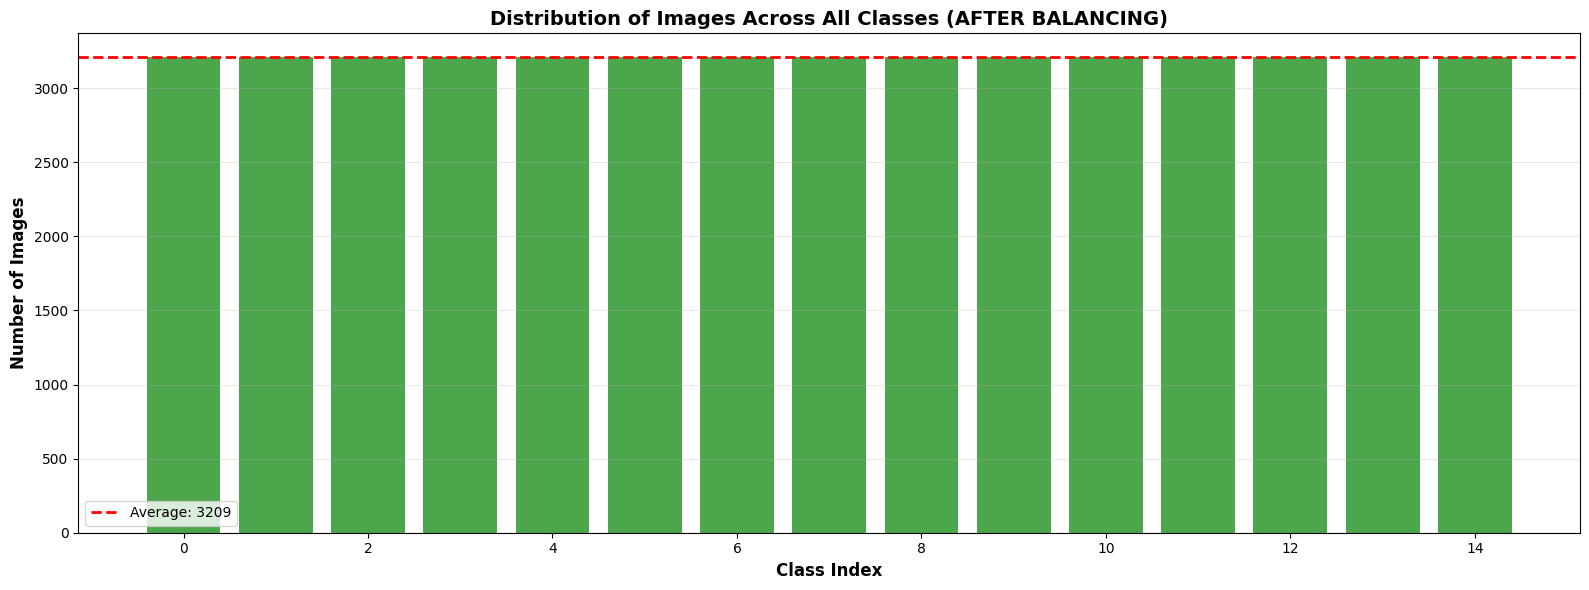


BEFORE vs AFTER BALANCING COMPARISON
Metric                                   Before               After               
--------------------------------------------------------------------------------
Total Images                             20,639               48,135              
Average per Class                        1,375                3,209               
Min Images                               152                  3,209               
Max Images                               3,209                3,209               
Standard Deviation                       719.40               0.00                


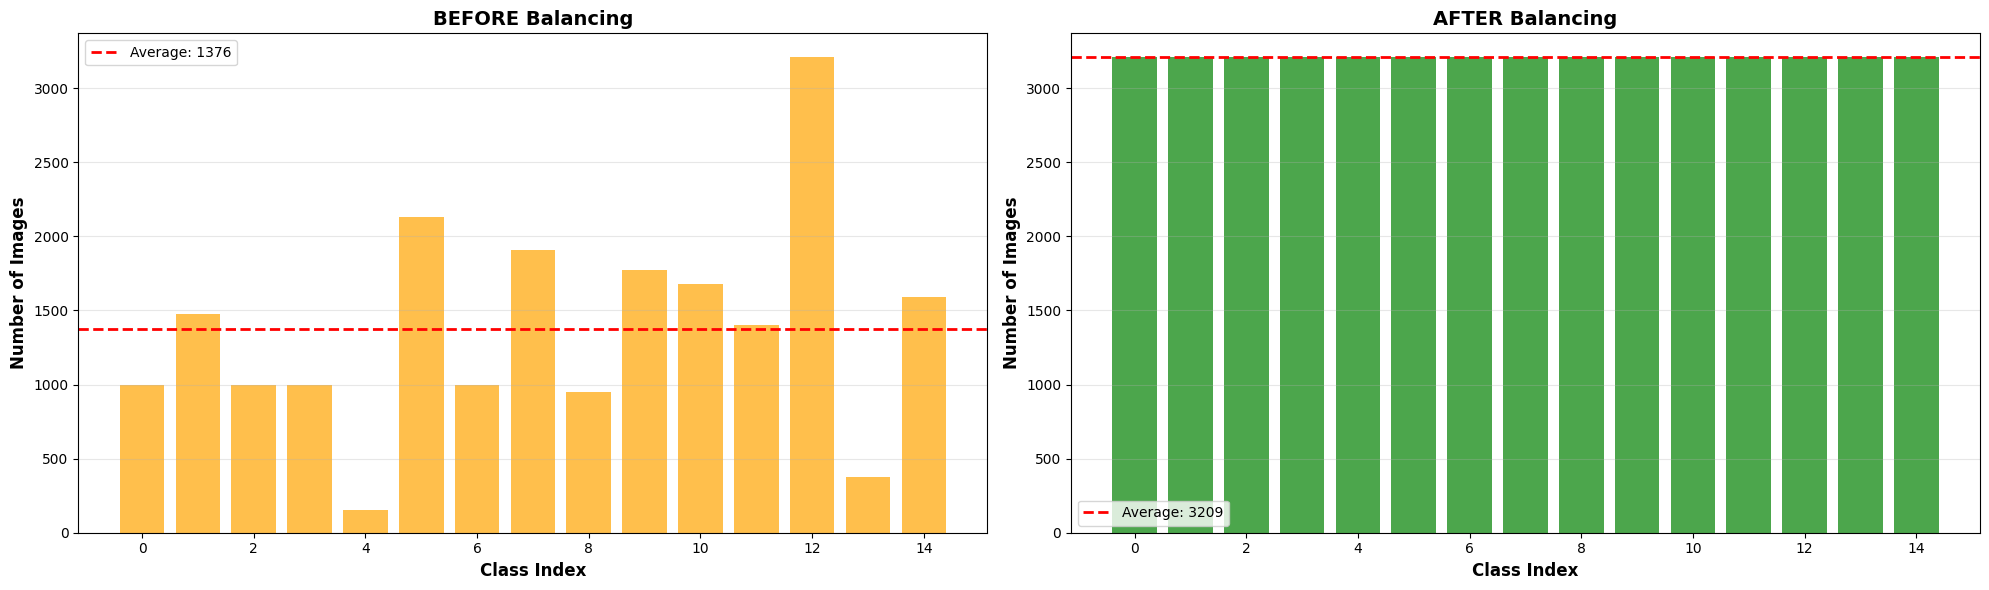


✓ Balanced dataset visualization complete!


In [13]:
# ============================================
# Count Images Per Class (AFTER BALANCING)
# ============================================

balanced_train_dir = "dataset_balanced/train"
balanced_class_distribution = {}

for cls in classes:
    cls_path = os.path.join(balanced_train_dir, cls)
    if os.path.isdir(cls_path):
        num_images = len([f for f in os.listdir(cls_path)
                         if os.path.isfile(os.path.join(cls_path, f))])
        balanced_class_distribution[cls] = num_images

# Sort by count (descending order - highest to lowest)
sorted_balanced_classes = sorted(balanced_class_distribution.items(), key=lambda x: x[1], reverse=True)

# Print header
print(f"{'='*80}")
print(f"IMAGE COUNT PER CLASS AFTER BALANCING (SORTED BY COUNT Descending)")
print(f"{'='*80}")
print(f"{'No.':<5} {'Class Name':<50} {'Count':>10}")
print(f"{'-'*80}")

# Print each class with its count
for idx, (cls_name, count) in enumerate(sorted_balanced_classes, 1):
    print(f"{idx:<5} {cls_name:<50} {count:>10,}")

# Print summary statistics
print(f"{'-'*80}")
print(f"{'TOTAL CLASSES':<55} {len(balanced_class_distribution):>10}")
print(f"{'TOTAL IMAGES':<55} {sum(balanced_class_distribution.values()):>10,}")
print(f"{'AVERAGE IMAGES PER CLASS':<55} {sum(balanced_class_distribution.values())//len(balanced_class_distribution):>10,}")
print(f"{'MIN IMAGES IN A CLASS':<55} {min(balanced_class_distribution.values()):>10,}")
print(f"{'MAX IMAGES IN A CLASS':<55} {max(balanced_class_distribution.values()):>10,}")
print(f"{'='*80}")

# ============================================
# Visualize Balanced Class Distribution (SINGLE PLOT)
# ============================================

import matplotlib.pyplot as plt
import numpy as np

# Calculate statistics
total_images_balanced = sum(balanced_class_distribution.values())
avg_images_balanced = np.mean(list(balanced_class_distribution.values()))

# Create figure with ONE plot
fig, ax = plt.subplots(figsize=(16, 6))

class_names_short = [cls[:30] for cls in balanced_class_distribution.keys()]
counts = list(balanced_class_distribution.values())

ax.bar(range(len(counts)), counts, alpha=0.7, color='green')
ax.axhline(y=avg_images_balanced, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_images_balanced:.0f}')

ax.set_xlabel('Class Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Images Across All Classes (AFTER BALANCING)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# BEFORE vs AFTER COMPARISON
# ============================================

print(f"\n{'='*80}")
print(f"BEFORE vs AFTER BALANCING COMPARISON")
print(f"{'='*80}")
print(f"{'Metric':<40} {'Before':<20} {'After':<20}")
print(f"{'-'*80}")
print(f"{'Total Images':<40} {sum(class_distribution.values()):<20,} {total_images_balanced:<20,}")
print(f"{'Average per Class':<40} {sum(class_distribution.values())//len(class_distribution):<20,} {int(avg_images_balanced):<20,}")
print(f"{'Min Images':<40} {min(class_distribution.values()):<20,} {min(balanced_class_distribution.values()):<20,}")
print(f"{'Max Images':<40} {max(class_distribution.values()):<20,} {max(balanced_class_distribution.values()):<20,}")
print(f"{'Standard Deviation':<40} {np.std(list(class_distribution.values())):<20,.2f} {np.std(list(balanced_class_distribution.values())):<20,.2f}")
print(f"{'='*80}")

# ============================================
# Side-by-Side Visualization (BEFORE vs AFTER)
# ============================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# BEFORE plot
counts_before = list(class_distribution.values())
avg_before = np.mean(counts_before)

ax1.bar(range(len(counts_before)), counts_before, alpha=0.7, color='orange')
ax1.axhline(y=avg_before, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_before:.0f}')
ax1.set_xlabel('Class Index', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.set_title('BEFORE Balancing', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# AFTER plot
ax2.bar(range(len(counts)), counts, alpha=0.7, color='green')
ax2.axhline(y=avg_images_balanced, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_images_balanced:.0f}')
ax2.set_xlabel('Class Index', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax2.set_title('AFTER Balancing', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Balanced dataset visualization complete!")

## **🧠 Model Development, Training & Evaluation (EfficientNetB3)**

### **📌 14. Dataset Paths for Model Training**



#### **📂 Purpose:** Define training, validation, and test directories.

**⚙️ Also sets:**

1. Image size

2. Batch size

3. Number of classes

In [14]:

# ============================================
# 📌 CELL 2: Dataset Paths (USES EXISTING STRUCTURE)
# ============================================
train_dir = "dataset_balanced/train"
val_dir = "dataset/val"
test_dir = "dataset/test"


img_height = img_width = 224 # change to 300 if GPU allows
batch_size = 32
num_classes = len(os.listdir(train_dir))


print(f"Number of classes: {num_classes}")

Number of classes: 15


###**📌 15. Data Generators (EfficientNet Compatible)**


####**🔄 Purpose:**

Apply EfficientNet preprocessing

Load images dynamically during training

⚠️ Uses preprocess_input instead of rescaling.

In [15]:
# ============================================
# 📌 CELL 3: Data Generators (EFFICIENTNET CORRECT)
# ============================================
train_datagen = ImageDataGenerator(
preprocessing_function=preprocess_input,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.1,
horizontal_flip=True
)


val_datagen = ImageDataGenerator(
preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical'
)


val_generator = val_datagen.flow_from_directory(
val_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical'
)

Found 48135 images belonging to 15 classes.
Found 4127 images belonging to 15 classes.


###**📌16. Build EfficientNetB3 Model**



####**🧠 Purpose:**

Load pretrained EfficientNetB3

Add custom classification head

❄️ Base model is frozen initially.

In [16]:
# ============================================
# 📌 CELL 4: Build EfficientNetB3 Model
# ============================================
base_model = EfficientNetB3(
weights='imagenet',
include_top=False,
input_shape=(img_height, img_width, 3)
)


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 11,180,862 (42.65 MB)

 Trainable params: 397,327 (1.52 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

### **📌 17. EfficientNetB3 Training and Fine-Tuning**



#### **🚀 Model Training & Fine-Tuning Strategy**

1. Compiles the EfficientNetB3 model using categorical cross-entropy loss and the Adam optimizer

2. Trains the model with the base network frozen to learn task-specific features from the new dataset

3. Unfreezes the top layers of EfficientNetB3 for fine-tuning while keeping lower layers frozen

4. Retrains the model with a lower learning rate to refine high-level features without overfitting

5. Uses validation data throughout training to monitor performance and generalization

In [17]:
# ============================================
# 📌 CELL 5: Compile & Train (Frozen Base)
# ============================================
model.compile(
optimizer=Adam(learning_rate=3e-5),
loss='categorical_crossentropy',
metrics=['accuracy']
)


history_frozen = model.fit(
train_generator,
epochs=10,
validation_data=val_generator
)
# ============================================
# 📌 CELL 6: Fine-Tuning EfficientNetB3
# ============================================
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 790s 497ms/step - accuracy: 0.1270 - loss: 2.6279 - val_accuracy: 0.6213 - val_loss: 1.5264
Epoch 2/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 742s 493ms/step - accuracy: 0.2199 - loss: 2.3629 - val_accuracy: 0.7359 - val_loss: 1.0813
Epoch 3/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 689s 458ms/step - accuracy: 0.2484 - loss: 2.2594 - val_accuracy: 0.7730 - val_loss: 0.8719
Epoch 4/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 756s 467ms/step - accuracy: 0.2740 - loss: 2.1942 - val_accuracy: 0.7965 - val_loss: 0.7489
Epoch 5/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 568s 378ms/step - accuracy: 0.2779 - loss: 2.1588 - val_accuracy: 0.8212 - val_loss: 0.6628
Epoch 6/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 759s 504ms/step - accuracy: 0.2856 - loss: 2.1292 - val_accuracy: 0.8306 - val_loss: 0.6012
Epoch 7/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 690s 430ms/step - accuracy: 0.2918 - loss: 2.1152 - val_accuracy: 0.8466 - val_loss: 0.5546
Epoch 8/10
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 577s 383ms/step - ac

### **📌 18. Evaluate on Test Set**





#### **🧪 Purpose:** Measure real‑world performance on unseen data.

📌 Reports final test accuracy.

In [18]:
# ============================================
# 📌 CELL 7: Evaluate on Test Set
# ============================================
test_generator = val_datagen.flow_from_directory(
test_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
shuffle=False
)


loss, accuracy = model.evaluate(test_generator)


print("\n==============================")
print(f"EfficientNetB3 Test Accuracy: {accuracy * 100:.2f}%")
print("==============================")

Found 4134 images belonging to 15 classes.
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 176ms/step - accuracy: 0.9611 - loss: 0.1126

EfficientNetB3 Test Accuracy: 95.19%


### **📌 19. Save Trained Model**



#### **💾 Purpose:** Save trained model in .keras format for deployment or reuse.

In [19]:
# ============================================
# 📌 CELL 8: Save Model
# ============================================
model.save("efficientnetb3_corrected.keras")
print("Model saved successfully")

Model saved successfully


### **📌 20. Detailed Evaluation Metrics**



#### **📑 Purpose:**

1. Classification report

2. Confusion matrix

3. Per‑class accuracy

**📊 Provides deep insight into model behavior.**

130/130 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step

CLASSIFICATION REPORT
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.97      0.98       200
                     Pepper__bell___healthy       0.97      1.00      0.98       296
                      Potato___Early_blight       0.97      0.99      0.98       200
                       Potato___Late_blight       0.98      0.94      0.96       200
                           Potato___healthy       0.91      1.00      0.95        31
                      Tomato_Bacterial_spot       0.94      0.98      0.96       426
                        Tomato_Early_blight       0.89      0.84      0.86       200
                         Tomato_Late_blight       0.94      0.97      0.96       382
                           Tomato_Leaf_Mold       0.93      0.94      0.93       191
                  Tomato_Septoria_leaf_spot       0.97      0.91      0.94       3

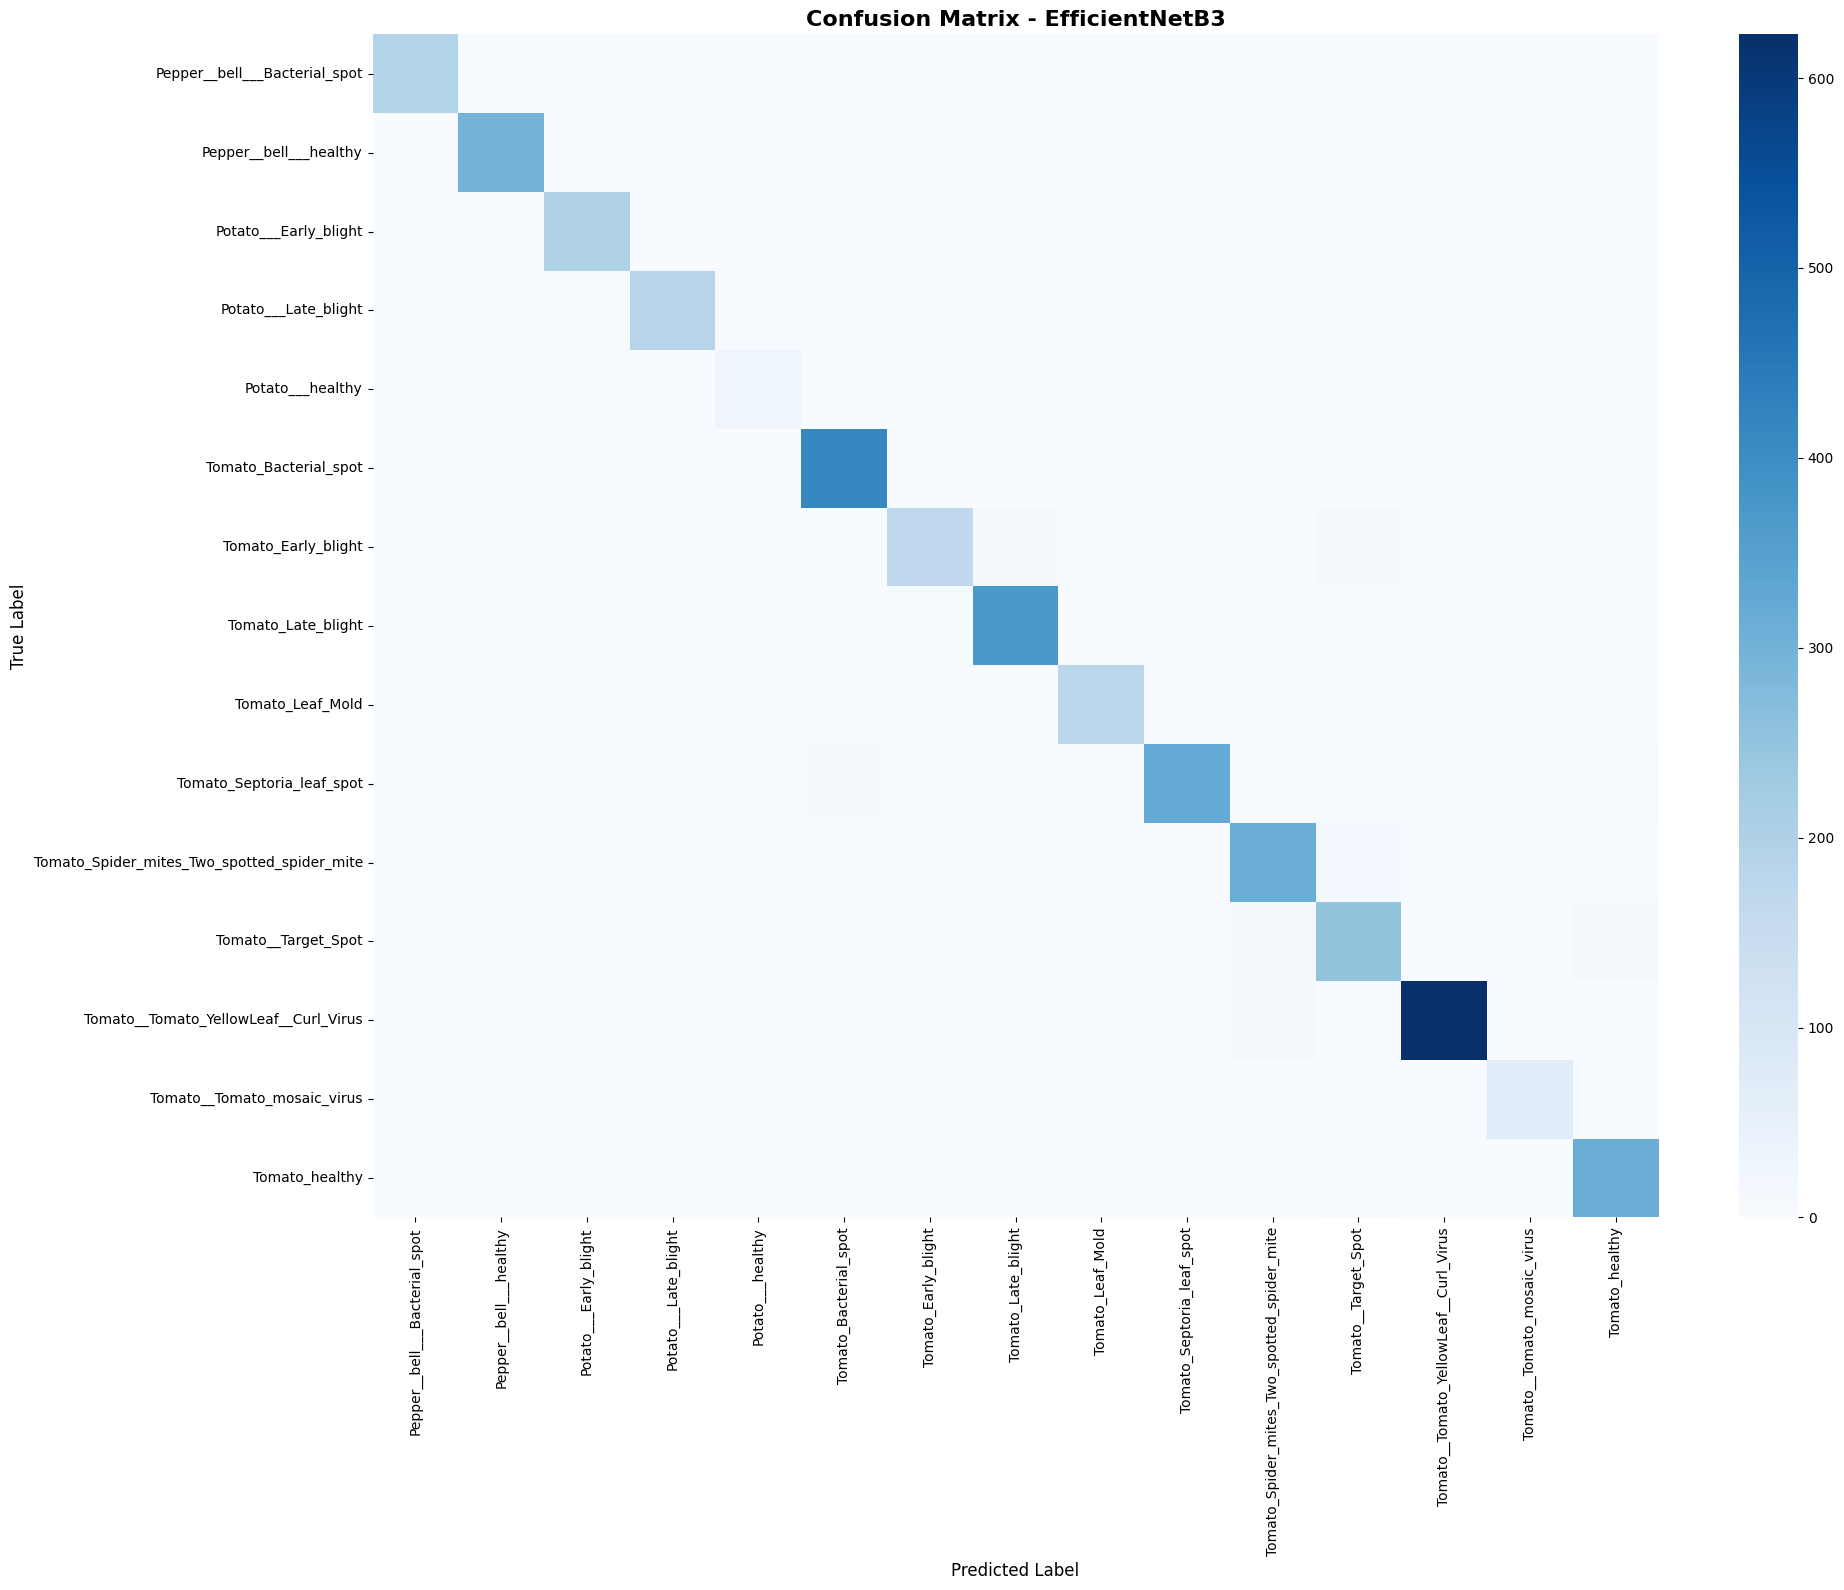

Pepper__bell___Bacterial_spot: 97.00%
Pepper__bell___healthy: 99.66%
Potato___Early_blight: 99.00%
Potato___Late_blight: 93.50%
Potato___healthy: 100.00%
Tomato_Bacterial_spot: 98.12%
Tomato_Early_blight: 84.00%
Tomato_Late_blight: 97.38%
Tomato_Leaf_Mold: 93.72%
Tomato_Septoria_leaf_spot: 90.99%
Tomato_Spider_mites_Two_spotted_spider_mite: 92.86%
Tomato__Target_Spot: 89.32%
Tomato__Tomato_YellowLeaf__Curl_Virus: 97.04%
Tomato__Tomato_mosaic_virus: 94.67%
Tomato_healthy: 98.12%


In [20]:
# ============================================
# 📌 DETAILED EVALUATION METRICS
# ============================================
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - EfficientNetB3', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(class_accuracy):
    print(f"{class_names[i]}: {acc*100:.2f}%")

### **📌 21. Training History Visualization**



####**📈 Purpose:** Plot accuracy and loss over time.

🧭 Shows transition from frozen training to fine‑tuning.

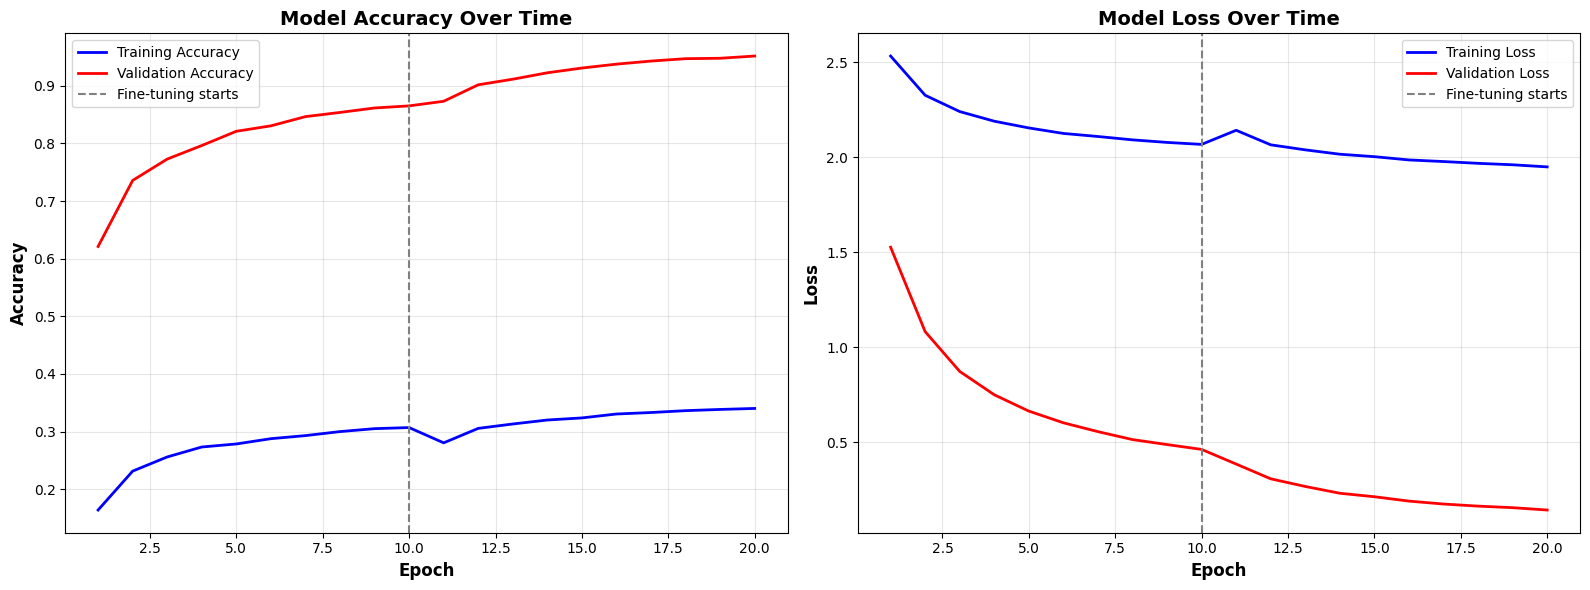

In [21]:
# ============================================
# 📌 TRAINING HISTORY PLOTS
# ============================================
def plot_training_history(history_frozen, history_finetune):
    # Combine histories
    frozen_acc = history_frozen.history['accuracy']
    frozen_val_acc = history_frozen.history['val_accuracy']
    frozen_loss = history_frozen.history['loss']
    frozen_val_loss = history_frozen.history['val_loss']

    finetune_acc = history_finetune.history['accuracy']
    finetune_val_acc = history_finetune.history['val_accuracy']
    finetune_loss = history_finetune.history['loss']
    finetune_val_loss = history_finetune.history['val_loss']

    # Concatenate
    all_acc = frozen_acc + finetune_acc
    all_val_acc = frozen_val_acc + finetune_val_acc
    all_loss = frozen_loss + finetune_loss
    all_val_loss = frozen_val_loss + finetune_val_loss

    epochs_range = range(1, len(all_acc) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Accuracy plot
    ax1.plot(epochs_range, all_acc, 'b-', label='Training Accuracy', linewidth=2)
    ax1.plot(epochs_range, all_val_acc, 'r-', label='Validation Accuracy', linewidth=2)
    ax1.axvline(x=10, color='gray', linestyle='--', label='Fine-tuning starts')
    ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax1.set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Loss plot
    ax2.plot(epochs_range, all_loss, 'b-', label='Training Loss', linewidth=2)
    ax2.plot(epochs_range, all_val_loss, 'r-', label='Validation Loss', linewidth=2)
    ax2.axvline(x=10, color='gray', linestyle='--', label='Fine-tuning starts')
    ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax2.set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history_frozen, history_finetune)

### **📌 22. Grad‑CAM Visualization**


####**🔥 Purpose:** Explain model predictions visually.

👁️ Highlights image regions influencing decisions.

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


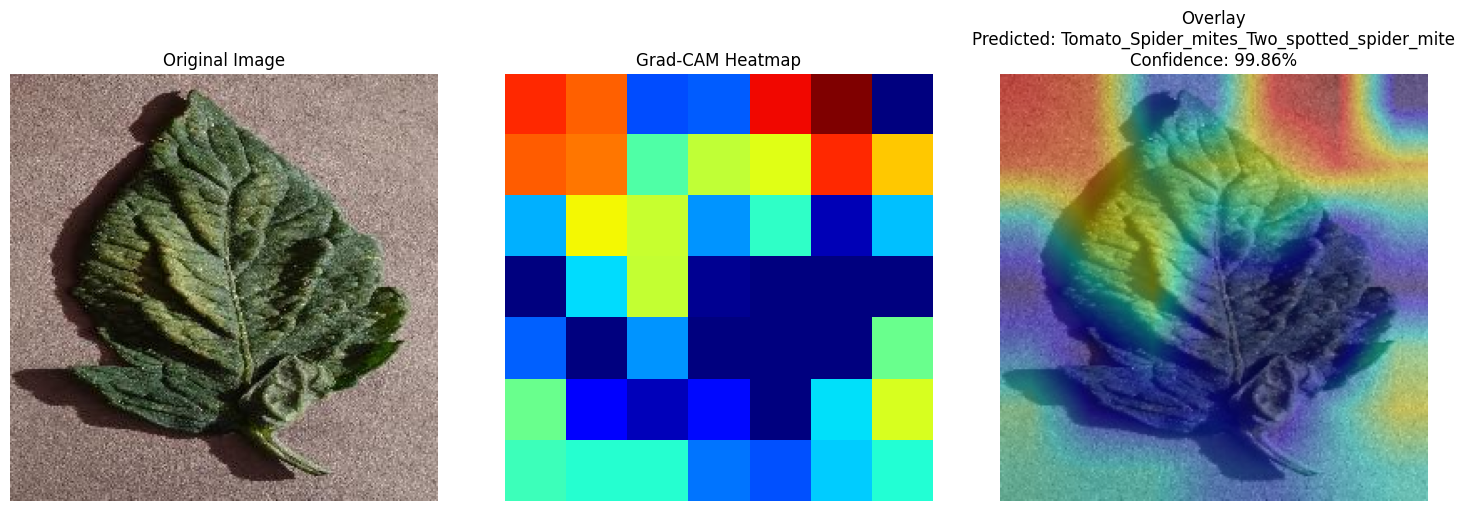

In [22]:
# ============================================
# 📌 GRAD-CAM VISUALIZATION
# ============================================
import cv2

def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

def overlay_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))

    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    return superimposed

# Example: Apply Grad-CAM to test images
last_conv_layer = 'top_conv'  # EfficientNetB3's last conv layer

# Get a test image
test_img_path = os.path.join(test_dir, os.listdir(test_dir)[0],
                             os.listdir(os.path.join(test_dir, os.listdir(test_dir)[0]))[0])

img = load_img(test_img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(np.expand_dims(img_array, axis=0))

# Get prediction
preds = model.predict(img_array)
predicted_class = class_names[np.argmax(preds[0])]
confidence = np.max(preds[0])

# Generate heatmap
heatmap = get_gradcam_heatmap(model, img_array, last_conv_layer)
gradcam_img = overlay_gradcam(test_img_path, heatmap)

# Display
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(load_img(test_img_path))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(heatmap, cmap='jet')
axes[1].set_title('Grad-CAM Heatmap')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(gradcam_img, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Overlay\nPredicted: {predicted_class}\nConfidence: {confidence:.2%}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

###**📌 23. Sample Predictions**



#### **🖼️ Purpose:** Display random test images with predictions.

✅ Green = correct | ❌ Red = incorrect

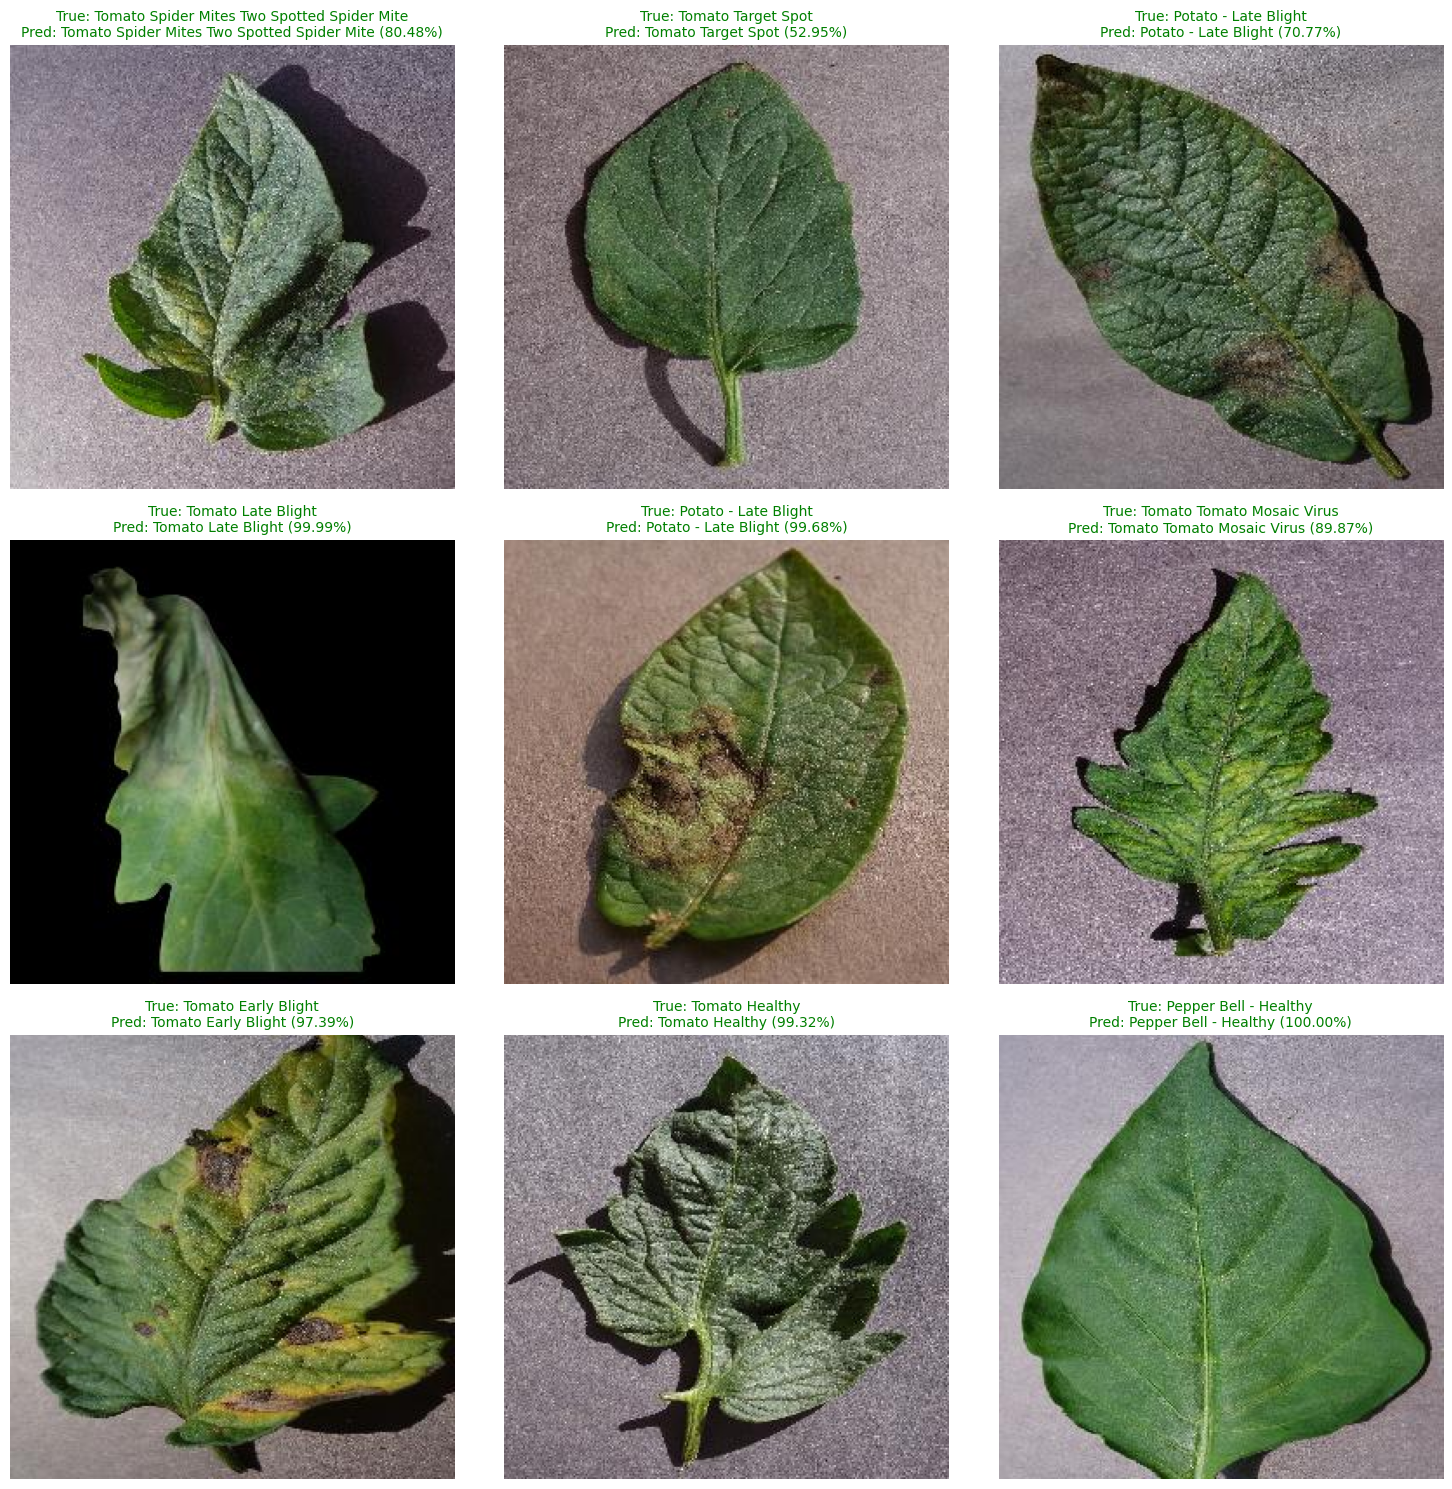

In [23]:
# ============================================
# 📌 SAMPLE PREDICTIONS
# ============================================
def show_predictions(model, test_dir, num_samples=9):
    class_names = sorted(os.listdir(test_dir))

    plt.figure(figsize=(15, 15))

    for i in range(num_samples):
        random_class = random.choice(class_names)
        class_path = os.path.join(test_dir, random_class)
        random_img = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, random_img)

        img = load_img(img_path, target_size=(224, 224))
        img_array = preprocess_input(np.expand_dims(img_to_array(img), axis=0))

        pred = model.predict(img_array, verbose=0)
        pred_class = class_names[np.argmax(pred)]
        confidence = np.max(pred)

        plt.subplot(3, 3, i+1)
        plt.imshow(load_img(img_path))

        color = 'green' if pred_class == random_class else 'red'
        plt.title(f'True: {format_class_name(random_class)}\n'
                  f'Pred: {format_class_name(pred_class)} ({confidence:.2%})',
                  color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_predictions(model, test_dir)

### **📌 24. Save Class Index Mapping**



#### **🗺️ Purpose:** Save class‑index mapping as JSON.

🖥️ Useful for GUI, APIs, or deployment.

In [24]:
# ============================================
# 📌 SAVE CLASS MAPPING
# ============================================
import json

class_indices = train_generator.class_indices
# Invert to get index -> class_name mapping
index_to_class = {v: k for k, v in class_indices.items()}

with open('class_indices.json', 'w') as f:
    json.dump(index_to_class, f, indent=4)

print("✓ Class indices saved for GUI")

✓ Class indices saved for GUI


###📌 **25. Classification Reports**

####**📑 Classification Reports (Train & Test Sets)**

Generates detailed classification reports with class names

Evaluates model performance separately on:

1. Training set

2. Test set

3. Reports precision, recall, F1-score, and support for each class



In [25]:
# ============================================
# 📌 CLASSIFICATION REPORTS WITH CLASS NAMES
# ============================================
from sklearn.metrics import classification_report
import numpy as np

# Get class names
class_names = list(train_generator.class_indices.keys())
formatted_class_names = [format_class_name(cls) for cls in class_names]

print("\n" + "="*80)
print("GENERATING CLASSIFICATION REPORTS (WITH CLASS NAMES)")
print("="*80)

# ============================================
# TRAINING SET
# ============================================
print("\n\t  Classification report for training set")
print("-" * 55)

train_generator.reset()
y_train_true = train_generator.classes
y_train_pred = model.predict(train_generator, verbose=1)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

train_report = classification_report(
    y_train_true,
    y_train_pred_classes,
    target_names=formatted_class_names,
    digits=2
)
print(train_report)

# ============================================
# TEST SET
# ============================================
print("\n\t   Classification report for test set")
print("-" * 55)

test_generator.reset()
y_test_true = test_generator.classes
y_test_pred = model.predict(test_generator, verbose=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

test_report = classification_report(
    y_test_true,
    y_test_pred_classes,
    target_names=formatted_class_names,
    digits=2
)
print(test_report)


GENERATING CLASSIFICATION REPORTS (WITH CLASS NAMES)

	  Classification report for training set
-------------------------------------------------------
1505/1505 ━━━━━━━━━━━━━━━━━━━━ 616s 409ms/step
                                             precision    recall  f1-score   support

               Pepper Bell - Bacterial Spot       0.06      0.03      0.04      3209
                      Pepper Bell - Healthy       0.06      0.03      0.04      3209
                      Potato - Early Blight       0.07      0.04      0.05      3209
                       Potato - Late Blight       0.07      0.02      0.03      3209
                           Potato - Healthy       0.06      0.05      0.05      3209
                      Tomato Bacterial Spot       0.08      0.03      0.05      3209
                        Tomato Early Blight       0.06      0.01      0.02      3209
                         Tomato Late Blight       0.06      0.03      0.04      3209
                           Tomato 

###**📌 26.  Model Architecture**

#### **🧩 Model Architecture Visualization & Summary**

Visualizes the complete EfficientNetB3 architecture and saves it as an image

Displays a detailed model summary including layer names and shapes

Computes and reports:

1. Total parameters

2. Trainable parameters

3. Non-trainable parameters

4. Estimated model size (MB)

5. Provides transparency into model complexity

In [33]:
# ============================================
# 📌 VISUALIZE MODEL ARCHITECTURE
# ============================================
from tensorflow.keras.utils import plot_model

# Plot model architecture
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top to Bottom
    expand_nested=True,
    dpi=96
)

print("✓ Model architecture saved to 'model_architecture.png'")

# Display model summary in a nice format
print("\n" + "="*80)
print("MODEL ARCHITECTURE SUMMARY")
print("="*80)
model.summary()

# Count parameters - FIXED VERSION
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print(f"\n{'='*80}")
print(f"PARAMETER SUMMARY")
print(f"{'='*80}")
print(f"{'Total Parameters:':<30} {total_params:>15,}")
print(f"{'Trainable Parameters:':<30} {trainable_params:>15,}")
print(f"{'Non-trainable Parameters:':<30} {non_trainable_params:>15,}")
print(f"{'Model Size (MB):':<30} {(total_params * 4) / (1024**2):>15.2f}")
print(f"{'='*80}")

✓ Model architecture saved to 'model_architecture.png'

MODEL ARCHITECTURE SUMMARY


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 19,083,858 (72.80 MB)

 Trainable params: 3,951,497 (15.07 MB)

 Non-trainable params: 7,229,365 (27.58 MB)

 Optimizer params: 7,902,996 (30.15 MB)


PARAMETER SUMMARY
Total Parameters:                 11,180,862.0
Trainable Parameters:                3,951,497
Non-trainable Parameters:          7,229,365.0
Model Size (MB):                         42.65


###**📌27. Learning Rate Schedule**

####**📉 Learning Rate Schedule Analysis**

Defines a staged learning rate schedule for training stability

Visualizes how the learning rate changes across epochs

Helps justify optimizer configuration and fine-tuning strategy

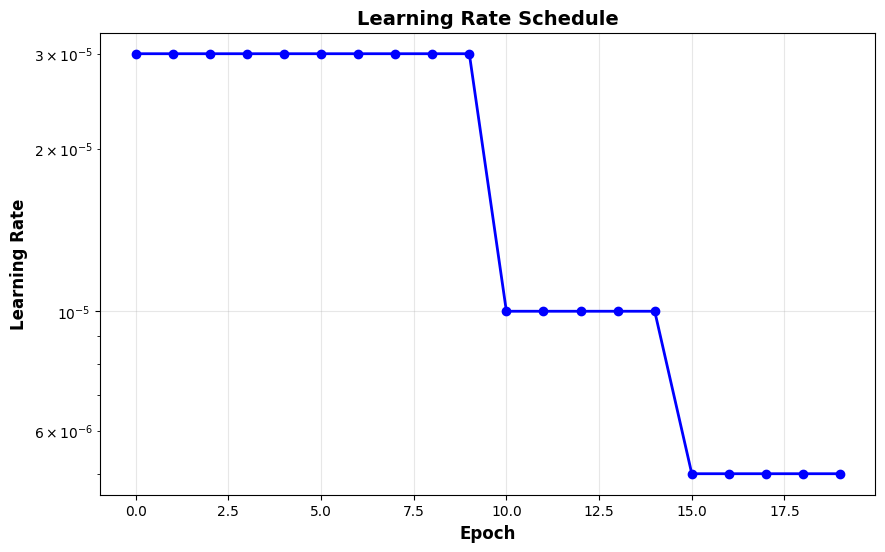

In [28]:
# ============================================
# 📌 LEARNING RATE FINDER (OPTIONAL BUT RECOMMENDED)
# ============================================
from tensorflow.keras.callbacks import LearningRateScheduler
import math

def lr_schedule(epoch, lr):
    """Learning rate schedule"""
    if epoch < 10:
        return 3e-5
    elif epoch < 15:
        return 1e-5
    else:
        return 5e-6

# Plot learning rate schedule
epochs_range = range(20)
lrs = [lr_schedule(e, 0) for e in epochs_range]

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, lrs, 'b-', linewidth=2, marker='o')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Learning Rate', fontsize=12, fontweight='bold')
plt.title('Learning Rate Schedule', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show()

### **📌 28.  Per-Class Performance Analysis**

####**📊 Per-Class Performance Analysis**

1. Computes precision, recall, F1-score, and accuracy for each class

2. Identifies the best and worst performing classes

3. Sorts classes based on F1-score for fair comparison

4. Visualizes top 10 and bottom 10 classes to highlight strengths and weaknesses


TOP 10 BEST PERFORMING CLASSES
                              Class  Precision   Recall  F1-Score  Support  Accuracy
              Pepper Bell - Healthy   0.970395 0.996622  0.983333      296  0.996622
Tomato Tomato Yellowleaf Curl Virus   0.993620 0.970405  0.981875      642  0.970405
       Pepper Bell - Bacterial Spot   0.989796 0.970000  0.979798      200  0.970000
              Potato - Early Blight   0.965854 0.990000  0.977778      200  0.990000
         Tomato Tomato Mosaic Virus   1.000000 0.946667  0.972603       75  0.946667
              Tomato Bacterial Spot   0.939326 0.981221  0.959816      426  0.981221
                     Tomato Healthy   0.937126 0.981191  0.958652      319  0.981191
               Potato - Late Blight   0.979058 0.935000  0.956522      200  0.935000
                 Tomato Late Blight   0.939394 0.973822  0.956298      382  0.973822
                   Potato - Healthy   0.911765 1.000000  0.953846       31  1.000000

TOP 10 WORST PERFORMING CLASSES


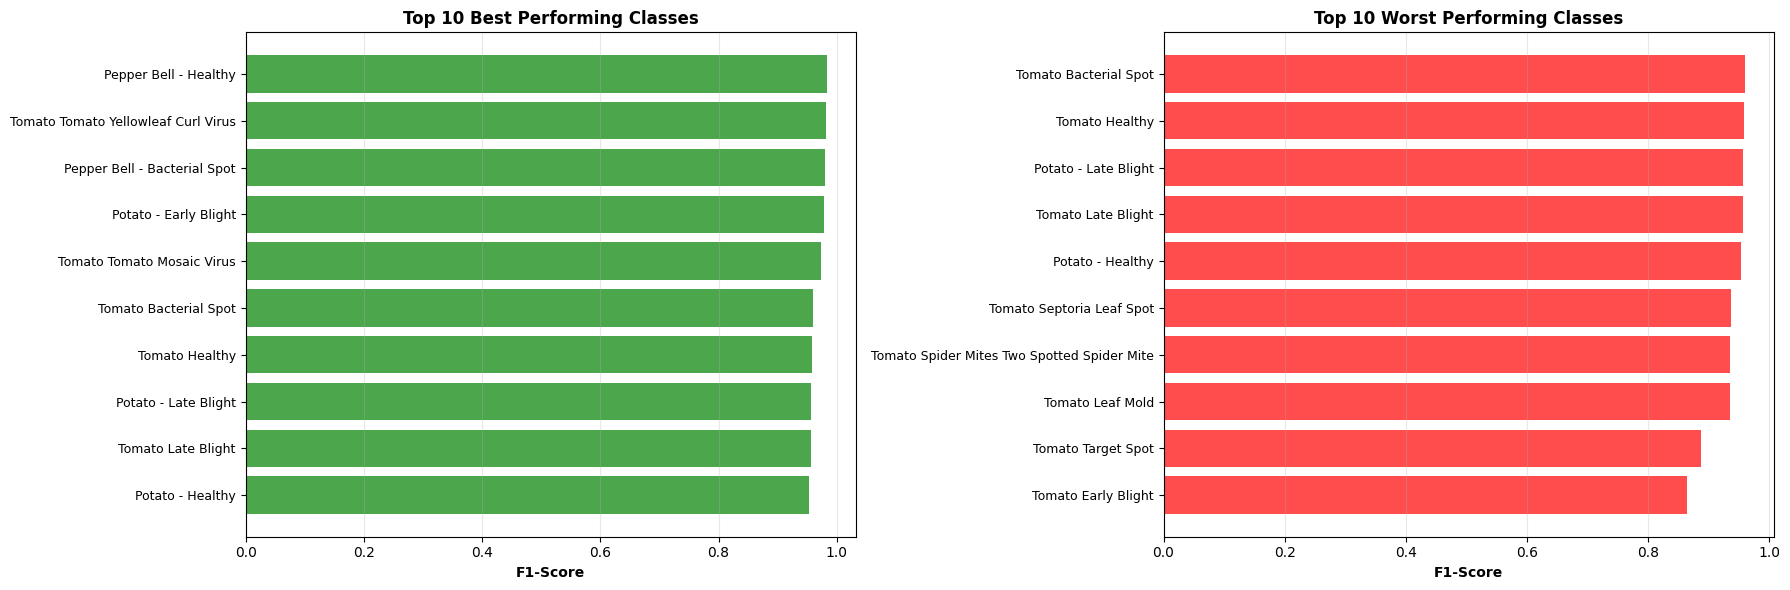

In [29]:
# ============================================
# 📌 PER-CLASS ACCURACY ANALYSIS
# ============================================
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

precision, recall, f1, support = precision_recall_fscore_support(
    y_test_true, y_test_pred_classes, average=None
)

# Create detailed DataFrame
class_names = list(test_generator.class_indices.keys())
performance_df = pd.DataFrame({
    'Class': [format_class_name(cls) for cls in class_names],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support,
    'Accuracy': [
        np.sum((y_test_true == i) & (y_test_pred_classes == i)) / np.sum(y_test_true == i)
        for i in range(len(class_names))
    ]
})

# Sort by F1-Score
performance_df_sorted = performance_df.sort_values('F1-Score', ascending=False)

print(f"\n{'='*100}")
print(f"TOP 10 BEST PERFORMING CLASSES")
print(f"{'='*100}")
print(performance_df_sorted.head(10).to_string(index=False))

print(f"\n{'='*100}")
print(f"TOP 10 WORST PERFORMING CLASSES")
print(f"{'='*100}")
print(performance_df_sorted.tail(10).to_string(index=False))

# Visualize top/bottom performers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top 10
top10 = performance_df_sorted.head(10)
ax1.barh(range(len(top10)), top10['F1-Score'], color='green', alpha=0.7)
ax1.set_yticks(range(len(top10)))
ax1.set_yticklabels(top10['Class'], fontsize=9)
ax1.set_xlabel('F1-Score', fontweight='bold')
ax1.set_title('Top 10 Best Performing Classes', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Bottom 10
bottom10 = performance_df_sorted.tail(10)
ax2.barh(range(len(bottom10)), bottom10['F1-Score'], color='red', alpha=0.7)
ax2.set_yticks(range(len(bottom10)))
ax2.set_yticklabels(bottom10['Class'], fontsize=9)
ax2.set_xlabel('F1-Score', fontweight='bold')
ax2.set_title('Top 10 Worst Performing Classes', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

###**📌 29. EfficientNetB3 Performance Summary**

#### **🏆 EfficientNetB3 Performance Summary**

Aggregates key evaluation metrics into a single results table

Reports:

1. Model size

2. Test accuracy

3. Test loss

4. Macro precision, recall, and F1-score

5. Visualizes test accuracy and saves results for reporting or comparison

In [1]:
# ============================================
# 📌 EFFICIENTNETB3 PERFORMANCE SUMMARY (ONE CELL)
# ============================================

# Helper function to count parameters
def count_params(weights_list):
    return int(sum([tf.keras.backend.count_params(w) for w in weights_list]))

# Count model parameters
total_params = count_params(model.weights)

# Get predictions
test_generator.reset()
y_test_true = test_generator.classes
y_test_pred = model.predict(test_generator, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_true, y_test_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test_true, y_test_pred_classes, average='macro'
)
loss = model.evaluate(test_generator, verbose=0)[0]

# Create results DataFrame (ONLY EfficientNetB3)
df_efficient = pd.DataFrame({
    'Model': ['EfficientNetB3'],
    'Parameters': [f'{total_params/1e6:.1f}M'],
    'Test Accuracy (%)': [accuracy * 100],
    'Test Loss': [loss],
    'Macro F1-Score': [f1],
    'Precision': [precision],
    'Recall': [recall]
})

# Print table
print(f"\n{'='*80}")
print("EFFICIENTNETB3 MODEL PERFORMANCE")
print(f"{'='*80}")
print(df_efficient.to_string(index=False))
print(f"{'='*80}")

# =====================
# 📊 Visualization
# =====================
plt.figure(figsize=(6, 5))

bars = plt.bar(
    df_efficient['Model'],
    df_efficient['Test Accuracy (%)'],
    edgecolor='black',
    alpha=0.85
)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylabel('Test Accuracy (%)', fontweight='bold')
plt.title('EfficientNetB3 Test Accuracy', fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('efficientnetb3_accuracy.png', dpi=150, bbox_inches='tight')
plt.show()

# Save results
df_efficient.to_csv('efficientnetb3_results.csv', index=False)
print("✓ Results saved to 'efficientnetb3_results.csv'")
print("✓ Accuracy chart saved as 'efficientnetb3_accuracy.png'")


NameError: name 'model' is not defined

###**📌 30. Training vs Testing Accuracy Comparison**

#### **⚖️ Training vs Testing Accuracy Comparison**

1. Computes overall accuracy on both training and test datasets

2. Compares performance to assess generalization capability

3. Helps detect overfitting or underfitting behavior

In [ ]:
# ============================================
# 📌 EFFICIENTNETB3 TRAIN vs TEST ACCURACY (%)
# ============================================

# -------- Train Accuracy --------
train_generator.reset()
y_train_true = train_generator.classes
y_train_pred = model.predict(train_generator, verbose=0)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

train_accuracy = accuracy_score(y_train_true, y_train_pred_classes) * 100

# -------- Test Accuracy --------
test_generator.reset()
y_test_true = test_generator.classes
y_test_pred = model.predict(test_generator, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

test_accuracy = accuracy_score(y_test_true, y_test_pred_classes) * 100

# -------- Print Results --------
print(f"\n{'='*60}")
print("EFFICIENTNETB3 ACCURACY SUMMARY")
print(f"{'='*60}")
print(f"Training Accuracy : {train_accuracy:.2f}%")
print(f"Testing Accuracy  : {test_accuracy:.2f}%")
print(f"{'='*60}")
